In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cifar10_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


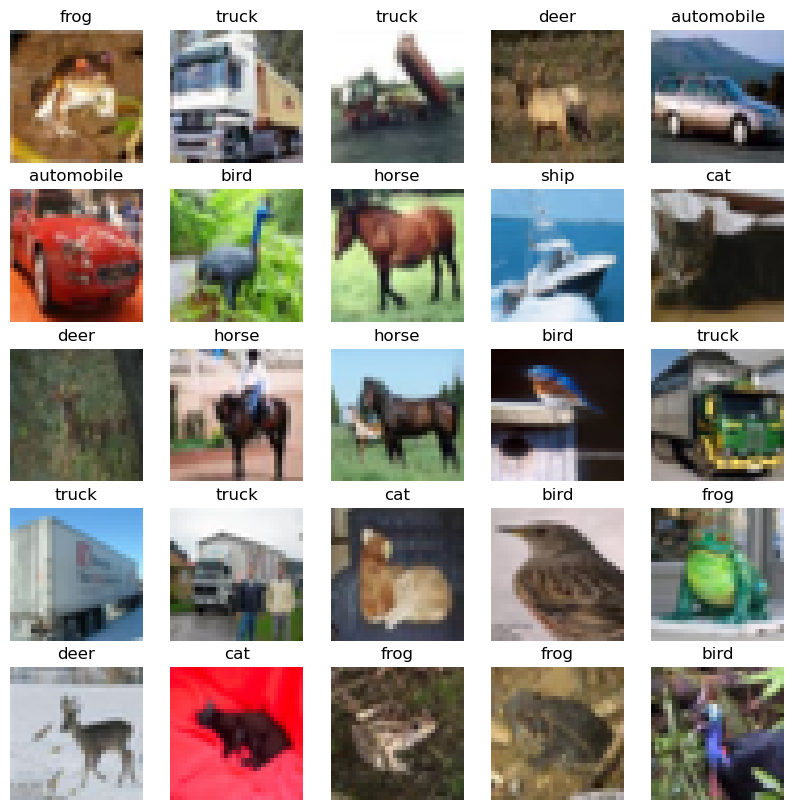

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    label_index = int(y_train[i])
    plt.title(cifar10_labels[label_index])
    plt.axis('off')
plt.show()

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(cifar10_labels), activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.callbacks import EarlyStopping
EPOCHS = 50
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/50
1563/1563 [==============================] - 41s 19ms/step - loss: 1.9142 - accuracy: 0.3057 - val_loss: 1.8018 - val_accuracy: 0.3578
Epoch 2/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7935 - accuracy: 0.3549 - val_loss: 1.8060 - val_accuracy: 0.3367
Epoch 3/50
1563/1563 [==============================] - 38s 24ms/step - loss: 1.7551 - accuracy: 0.3717 - val_loss: 1.7708 - val_accuracy: 0.3663
Epoch 4/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.7403 - accuracy: 0.3765 - val_loss: 1.7267 - val_accuracy: 0.3766
Epoch 5/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7229 - accuracy: 0.3827 - val_loss: 1.6904 - val_accuracy: 0.3990
Epoch 6/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7101 - accuracy: 0.3888 - val_loss: 1.7154 - val_accuracy: 0.3847
Epoch 7/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6952 - accuracy: 0.3930 - val_loss: 1.7124 -

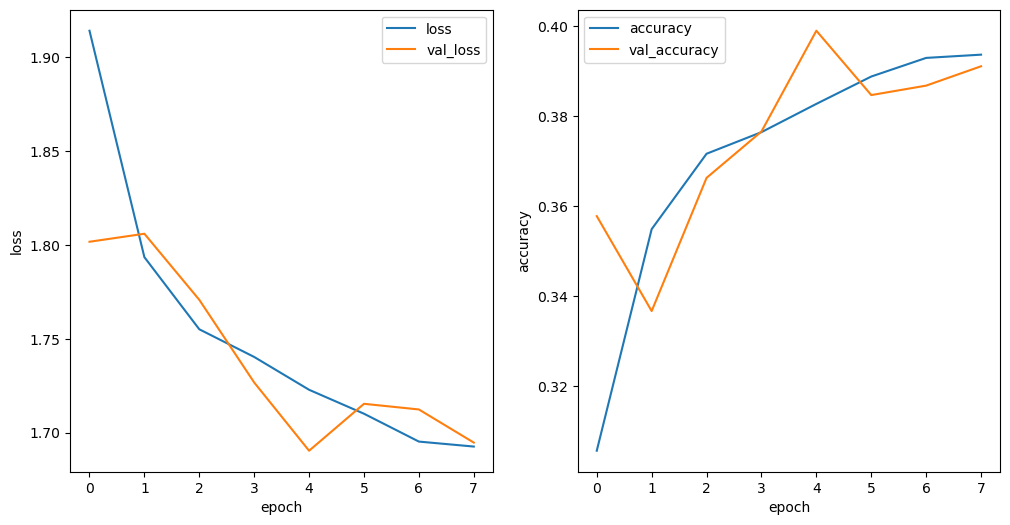

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(12,6))
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc, label = "accuracy")
plt.plot(val_acc, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()


In [9]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)
batch_size = 64

train_generator = gen.flow(X_train, y_train, batch_size=batch_size)


In [10]:
history2 = model.fit(train_generator, steps_per_epoch=X_train.shape[0]//batch_size, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/50
781/781 [==============================] - 94s 113ms/step - loss: 2.3507 - accuracy: 0.1025 - val_loss: 2.7240 - val_accuracy: 0.2340
Epoch 2/50
781/781 [==============================] - 86s 106ms/step - loss: 2.2924 - accuracy: 0.1389 - val_loss: 4.8682 - val_accuracy: 0.1871
Epoch 3/50
781/781 [==============================] - 91s 112ms/step - loss: 2.2081 - accuracy: 0.1828 - val_loss: 13.9286 - val_accuracy: 0.1633
Epoch 4/50
781/781 [==============================] - 84s 104ms/step - loss: 2.1517 - accuracy: 0.1872 - val_loss: 23.6196 - val_accuracy: 0.1577
Epoch 4: early stopping


In [11]:
model2 = Sequential()
model2.add(Flatten(input_shape=(32,32,3)))

model2.add(Dense(128, activation='relu'))
model2.add(Dense(len(cifar10_labels), activation='softmax'))

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import BatchNormalization

model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=EPOCHS, steps_per_epoch=X_train.shape[0]//batch_size, validation_data=(X_test, y_test), callbacks=[es])
results_loss3, results_acc3 = [], []
hist3 = pd.DataFrame(history3.history)
results_loss3.append(hist3.loss.tolist())
results_acc3.append(hist3.accuracy.tolist())

Epoch 1/50
781/781 [==============================] - 171s 209ms/step - loss: 1.5794 - accuracy: 0.4934 - val_loss: 1.2098 - val_accuracy: 0.5886
Epoch 2/50
781/781 [==============================] - 161s 206ms/step - loss: 1.0205 - accuracy: 0.6516 - val_loss: 0.9445 - val_accuracy: 0.6793
Epoch 3/50
781/781 [==============================] - 163s 209ms/step - loss: 0.8333 - accuracy: 0.7126 - val_loss: 1.0098 - val_accuracy: 0.6647
Epoch 4/50
781/781 [==============================] - 168s 215ms/step - loss: 0.7218 - accuracy: 0.7483 - val_loss: 0.7354 - val_accuracy: 0.7545
Epoch 5/50
781/781 [==============================] - 166s 213ms/step - loss: 0.6471 - accuracy: 0.7759 - val_loss: 0.7287 - val_accuracy: 0.7540
Epoch 6/50
781/781 [==============================] - 158s 202ms/step - loss: 0.5857 - accuracy: 0.7978 - val_loss: 0.7410 - val_accuracy: 0.7499
Epoch 7/50
781/781 [==============================] - 163s 209ms/step - loss: 0.5366 - accuracy: 0.8120 - val_loss: 0.6634 -

In [13]:
batch_sizes = [8, 16, 32, 64, 128, 256]
histories = []
results_loss, results_acc = [], []

for batch_size in batch_sizes:
    print(f"Ustawiona wielość zbioru: {batch_size}")
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation='relu'),
        Dense(64, activation='softmax'),
        Dense(32, activation='relu'),
        Dense(16, activation='softmax'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, y_test))
    hist = pd.DataFrame(history.history)
    results_loss.append(hist.loss.tolist())
    results_acc.append(hist.accuracy.tolist())

Ustawiona wielość zbioru: 8
Epoch 1/5
6250/6250 [==============================] - 58s 8ms/step - loss: 2.3034 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/5
6250/6250 [==============================] - 58s 9ms/step - loss: 2.3033 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/5
6250/6250 [==============================] - 53s 8ms/step - loss: 2.3032 - accuracy: 0.1004 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 4/5
6250/6250 [==============================] - 51s 8ms/step - loss: 2.3032 - accuracy: 0.0977 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/5
6250/6250 [==============================] - 53s 9ms/step - loss: 2.3032 - accuracy: 0.0998 - val_loss: 2.3031 - val_accuracy: 0.1000
Ustawiona wielość zbioru: 16
Epoch 1/5
3125/3125 [==============================] - 40s 10ms/step - loss: 2.3033 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/5
3125/3125 [==============================] - 31s 10ms/step - loss: 2

In [14]:
print(results_acc)
print(results_loss)

[[0.09967999905347824, 0.09861999750137329, 0.10041999816894531, 0.097680002450943, 0.09984000027179718], [0.09860000014305115, 0.1003199964761734, 0.09989999979734421, 0.09839999675750732, 0.09777999669313431], [0.1664000004529953, 0.19210000336170197, 0.20297999680042267, 0.22725999355316162, 0.2635999917984009], [0.1420000046491623, 0.19023999571800232, 0.20469999313354492, 0.22713999450206757, 0.24945999681949615], [0.11326000094413757, 0.17061999440193176, 0.18036000430583954, 0.18950000405311584, 0.19750000536441803], [0.13402000069618225, 0.16750000417232513, 0.17032000422477722, 0.1800599992275238, 0.18926000595092773]]
[[2.3033645153045654, 2.3032753467559814, 2.3032021522521973, 2.303206205368042, 2.303215980529785], [2.3032758235931396, 2.303053379058838, 2.30306339263916, 2.3031368255615234, 2.303082227706909], [2.161094903945923, 2.0588297843933105, 2.019442319869995, 1.9780815839767456, 1.926822304725647], [2.2407844066619873, 2.0751101970672607, 2.0304489135742188, 1.992

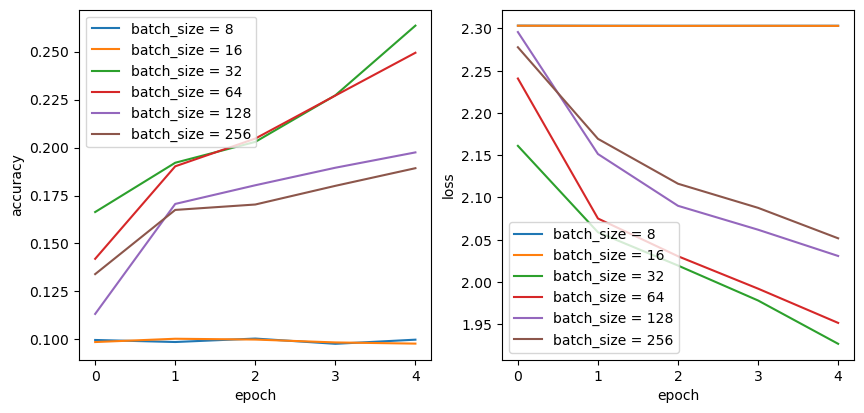

In [15]:
#make a plot for accuracy and loss for each batch size
plt.figure(figsize=(10,10))
for i in range(len(batch_sizes)):
    plt.subplot(2,2,1)
    plt.plot(results_acc[i], label = f"batch_size = {batch_sizes[i]}")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.subplot(2,2,2)
    plt.plot(results_loss[i], label = f"batch_size = {batch_sizes[i]}")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()